# Food project


![image.jpg](img.jpg)

Img source: fair-point.com

## Discovery (identificazione del problema e degli obiettivi)

Negli ultimi secoli la popolazione mondiale è aumentata notevolmente e secondo l'ONU (fonte del 2019), nel 2050 potrebbe arrivare a quota *10 miliardi*. 

In maniera direttamente proporzionale **sono aumentate anche le domande di cibo, energia ed acqua**, per soddisfare tale bisogno. 

Sfortunamente, i costanti monitoraggi sul cambiamento climatico indicano che la **temperatura massima annuale sulla Terra sta cambiando pericolosamente** e parte di questo effetto è *direttamente correlato alla produzione agricola e all'allevamento* (questo settore ha un impatto del **25-30% sulle emissioni totali di CO₂**):


**L'obiettivo di questo notebook** è quello di fornire una visione di insieme sulla *produzione mondiale di alimenti e mangimi* e sui *principali fenomeni inquinanti* (emissioni di CO₂ dovute alla catena produttiva e variazioni di temperatura).

### Spunti e domande che guideranno questa analisi

#### Confronto tra produzione di cibo e mangime a livello mondiale: 
    
- Come è variata la loro produzione negli anni?

- Quali paesi sono i maggiori produttori? 

- Quali sono gli alimenti maggiormente prodotti?

#### Processo produttivo e inquinamento:

- La produzione di quali alimenti ha un impatto maggiormente negativo sull'ambiente?

- Quale fase della produzione alimentare contribuisce maggiormente all'emissione di gas serra?

- Quali sono gli alimenti la cui produzione ha meno impatto per le emissioni di gas serra?

- Quanto si è innalzata la temperatura globale dall'ultimo secolo ad oggi?

---
---
## Data Selection

Questo progetto sfrutta diversi datasets: 

- Il [primo](https://www.kaggle.com/datasets/dorbicycle/world-foodfeed-production), disponibile sul **portale FAOSTAT** della FAO (Food and Agriculture Organization of the United Nations), contiene i dati di produzione dei cibi (denominati 'food') e dei mangimi (denominati 'feed') a livello mondiale, dal 1961 al 2013.

- Il [secondo](https://www.kaggle.com/datasets/selfvivek/environment-impact-of-food-production), fornito da **Our World in Data**, mostra principalmente i quantitativi di gas serra che sono emessi nei vari step della catena produttiva dei 43 alimenti più comuni prodotti nel mondo.

- Il [terzo](https://www.kaggle.com/datasets/sevgisarac/temperature-change/code?datasetId=1056827&sortBy=voteCount), fornito anch'esso da **FAOSTAT** coniente dati sulla variazione media della temperatura superficiale per paese, con aggiornamenti annuali del periodo 1961–2019. I valori registrati in questo dataset sono intesi come anomalie, cioè variazioni di temperatura rispetto a una climatologia di base, corrispondente al periodo 1951-1980.

### Import di moduli e dati

In [1]:
# Librerie essenziali per la manipolazione dati 
import numpy as np 
import pandas as pd

# Librerie per la visualizzazione dei dati
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

# import plotly.graph_objs as go
# import plotly.tools as tls


# Librerie utili
import fuzzywuzzy
from fuzzywuzzy import process
import warnings


# Settings delle librerie
pd.set_option('display.max_columns', None) # Preferisco visualizzare sempre tutte le colonne a disposizione dei datasets
pd.set_option('display.max_rows', 66)
warnings.filterwarnings("ignore")

c:\Users\emanu\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



In [2]:
# Dataset della produzione di cibi/mangimi dei vari paesi del mondo
fao_df = pd.read_csv('Data/Fao.csv')
df_prod = fao_df.copy()

# Dataset delle emissioni di gas serra per la produzione di alimenti
emission_df = pd.read_csv('Data/Food_Production.csv')
df_emiss = emission_df.copy()

# Dataset delle variazioni di temperatura nel mondo
temperature_df = pd.read_csv('Data/Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin-1')
df_temp = temperature_df.copy()

# Dataset utile contenente i codici ISO-3 dei paesi
country_iso3 = pd.read_csv('Data/FAOSTAT_data_11-24-2020.csv')

---
---
## Data Cleaning & Data Exploration/Trasformation

La sezione del notebook immediatamente successiva è funzionale a preparare i tre dataset per l'indagine esplorativa e alla visualizzazione dei dati.

### Dataset della produzione di cibi/mangimi dei vari paesi del mondo

In [3]:
print(f"Dimensioni del dataframe: {df_prod.shape[0]} righe e {df_prod.shape[1]} colonne.")
print("\nColonne del dataframe:\n", df_prod.columns)
df_prod.head()

Dimensioni del dataframe: 21477 righe e 63 colonne.

Colonne del dataframe:
 Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')


,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,1963.0,2215.0,2310.0,2335.0,2434.0,2512.0,2282.0,2454.0,2443.0,2129.0,2133.0,2068.0,1994.0,1851.0,1791.0,1683.0,2194.0,1801.0,1754.0,1640.0,1539.0,1582.0,1840.0,1855.0,1853.0,2177.0,2343.0,2407.0,2463.0,2600.0,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,205.0,233.0,246.0,246.0,255.0,263.0,235.0,254.0,270.0,259.0,248.0,217.0,217.0,197.0,186.0,200.0,193.0,202.0,191.0,199.0,197.0,249.0,218.0,260.0,319.0,254.0,326.0,347.0,270.0,372.0,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,73.0,74.0,71.0,70.0,72.0,76.0,77.0,80.0,60.0,65.0,64.0,64.0,60.0,55.0,53.0,51.0,48.0,46.0,46.0,47.0,46.0,43.0,43.0,40.0,50.0,46.0,41.0,44.0,50.0,48.0,43.0,26.0,29.0,70.0,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,223.0,219.0,225.0,240.0,244.0,255.0,185.0,203.0,198.0,202.0,189.0,174.0,167.0,160.0,151.0,145.0,145.0,148.0,145.0,135.0,132.0,120.0,155.0,143.0,125.0,138.0,159.0,154.0,141.0,84.0,83.0,122.0,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,236.0,200.0,201.0,216.0,228.0,231.0,234.0,240.0,228.0,234.0,228.0,226.0,210.0,199.0,192.0,182.0,173.0,170.0,154.0,148.0,137.0,144.0,126.0,90.0,141.0,150.0,159.0,108.0,90.0,99.0,72.0,35.0,48.0,89.0,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
# Elimino le colonne non necessarie
df_prod.drop(columns=['Area Code', 'Item Code', 'Element Code', 'Unit'], inplace=True)

# Rimuovo la 'Y' dalle labels degli anni
df_prod.rename(columns={x:x[1:] for x in df_prod.columns if 'Y' in x}, inplace=True)

# Cambio i nomi ad alcune labels 
df_prod.rename(columns={'Area': 'Country_Name', 'Area Abbreviation':'Country_Code'}, inplace=True)

#### Valori mancanti e variabili quantitative

Procedo verificando la presenza di valori mancanti (*NaN*) nel dataset. Se effettivamente presenti, approfondisco l'analisi per sapere quanti sono e in quali colonne sono maggiormente frequenti. Inoltre, proverò a fare un *imputation*, ovvero a stabilire il motivo della loro presenza. 

In [5]:
# La funzione pd.DataFrame.info() è un ottimo strumento, ma in questo caso si ottiene un output confusionario, 
# quindi costruisco una tabella riassuntiva più leggibile sui Dtype, valori unici e valori mancanti di tutte le colonne
print("Dtype, Valori unici e Valori mancanti(%) di ciascuna colonna:")

df_prod_info= pd.DataFrame({"Dtype": df_prod.dtypes, 
                            "Valori unici": df_prod.nunique(),
                            "Valori mancanti(%)": round(df_prod.isnull().sum()/df_prod.shape[0]*100, 2)
                            }).rename_axis('Colonne', axis='rows')                       

df_prod_info

Dtype, Valori unici e Valori mancanti(%) di ciascuna colonna:


,Dtype,Valori unici,Valori mancanti(%)
Colonne,,,
Country_Code,object,169,0.00
Country_Name,object,174,0.00
Item,object,115,0.00
Element,object,2,0.00
latitude,float64,173,0.00
longitude,float64,174,0.00
1961,float64,1197,16.48
1962,float64,1215,16.48
1963,float64,1209,16.48


Le colonne che contengono le percentuali maggiori di valori mancanti sono quelle che indicano i dati di produzione *tra il 1961 e il 1991*. 

Come si può leggere nella documentazione del dataset:

>The Food Balance sheet's data was relatively complete. A few countries that do not exist anymore, such as Czechoslovakia, were deleted from the database. Countries which were formed lately such as South Sudan were kept, even though they do not have all full data going back to 1961. [...]

Quindi, in un certo senso, sembrerebbe che particolari *evoluzioni geopolitiche di alcuni paesi* siano la causa dell'indisponibilità dei dati.  

Prendo un campione a caso dove sono presenti questi valori mancanti, cercando di fare chiarezza e di confermare le informazioni contenute nella documentazione del dataset.  

In [6]:
# Creo un subset del dataframe contenente almeno un valore nullo nelle righe
df_null_rows = df_prod.loc[df_prod.isnull().any(axis=1)]
print(f'\nNumero di righe con valori mancanti: {df_null_rows.shape[0]}')

# Imposto un random seed per rendere pseudorandomica e riproducibile questa cella
np.random.seed(0)

# Seleziono un campione a caso di 5 elementi
df_null_rows.sample(5)


Numero di righe con valori mancanti: 3539


,Country_Code,Country_Name,Item,Element,latitude,longitude,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
17328,SVK,Slovakia,Millet and products,Feed,48.67,19.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1
13020,MNE,Montenegro,Apples and products,Food,42.71,19.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,19.0,34.0,38.0,33.0,27.0,14,13
17526,SVN,Slovenia,Pigmeat,Food,46.15,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,81.0,84.0,75.0,70.0,73.0,77.0,87.0,76.0,82.0,78.0,88.0,88.0,88.0,89.0,84.0,84.0,80.0,81.0,76.0,69,58
11128,LVA,Latvia,Beer,Food,56.88,24.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,53.0,66.0,67.0,66.0,73.0,82.0,100.0,99.0,105.0,134.0,142.0,124.0,144.0,147.0,158.0,156.0,146.0,164.0,172.0,163,156
16103,RUS,Russian Federation,Coconuts - Incl Copra,Food,61.52,105.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,2.0,2.0,10.0,10.0,21.0,28.0,42.0,45.0,47.0,52.0,45.0,59.0,42.0,39.0,48.0,63.0,57,63


In effetti, in questi 5 paesi selezionati a caso: 'Slovacchia', 'Montenegro', 'Slovenia', 'Lettonia' e 'Federazione Russa', i dati di produzione sono mancanti dal 1961 al 1991 (il Montenegro fino al 2005). 

Cercando informazioni sulla storia geopolitica di questi paesi si può leggere:

- *Slovacchia*: [...] La Repubblica Slovacca e la Repubblica Ceca sono nate il 1º gennaio 1993 dalla divisione, sancita dal parlamento della Cecoslovacchia, che **già dal 1990 aveva assunto il nome di Repubblica Federale Ceca e Slovacca**;

- *Montenegro*: [...] Fino al 2 giugno 2006 la Repubblica del Montenegro è stata unita alla Repubblica di Serbia con il nome di Serbia e Montenegro. **Dal 3 giugno 2006 il Montenegro è diventato uno Stato indipendente**;

- *Slovenia*: [...] Dal 1º maggio 2004 la Slovenia è membro dell'Unione europea e la valuta nazionale, dal 1º gennaio 2007, è l'euro, che ha sostituito il tallero sloveno, adottato **nel 1991 dopo l'indipendenza** [...];

- *Lettonia*: [...] L'URSS riconobbe **la Lettonia come Stato indipendente il 6 settembre 1991** [...];

- *Federazione Russa*: [...] Nell'agosto del 1991 il tentato colpo di Stato militare per deporre Gorbačëv e preservare l'Unione Sovietica portò invece alla fine del Partito Comunista dell'Unione Sovietica. Nonostante la contraria volontà espressa dal popolo, **il 26 dicembre 1991 l'Unione Sovietica si dissolse in quindici Stati post-sovietici**.

Fonte: [Wikipedia](https://it.wikipedia.org/wiki/Pagina_principale)

Questo risultato **è in linea con la documentazione** del dataset, giustificando il retroscena che riguarda la presenza di valori mancanti.

**È conveniente** eliminare dal dataframe le righe che contengono valori mancanti, oppure si rischia di perdere un numero **eccessivo** di informazioni? Eseguo un test per controllare.

In [7]:
# Creo un dataframe per testare l'eliminazione delle righe che contengono valori mancanti 
test_drop = df_prod.dropna()

# Calcolo la percentuale di dati eliminati 
rows_removal_perc = round((1-test_drop.shape[0]/df_prod.shape[0])*100,2)

print(f"\nRighe del dataframe originale: {df_prod.shape[0]}.") 

print(f"\nRighe del dataframe dopo aver rimosso i valori mancanti: {test_drop.shape[0]}")

print(f'\nLa rimozione delle righe che contengono valori NaN ha eliminato il {rows_removal_perc}% dei dati!')


Righe del dataframe originale: 21477.

Righe del dataframe dopo aver rimosso i valori mancanti: 17938

La rimozione delle righe che contengono valori NaN ha eliminato il 16.48% dei dati!


Secondo me, in questo caso **la perdita di dati è tollerabile**. Quindi, continuerò lo studio di questo dataset adottando questa procedura.

Avrei anche potuto sostituire i valori NaN con 0 tramite *fillna()* e poi eliminare le righe con solo zeri. Tuttavia, ho notato che la differenza nella procedura *in questo caso* è minima. 

Per terminare la pulizia delle variabili quantitative elimino tutte le righe dove i valori di produzione lungo l'intero periodo temporale sono **pari a zero o negativi** e trasformo tutti i valori numerici in int64.

In [8]:
# Seleziono un subset del dataframe contenente tutte le colonne degli anni di produzione del dataframe
prod_values = test_drop.loc[:, '1961':]

# Ricavo gli indici delle righe che contengono anche solo un numero negativo e tutti 0 dal 1961 al 2013
idx_to_drop = prod_values.loc[((prod_values < 0).any(axis=1)) | (prod_values == 0).all(axis=1)].index

# Elimino tutte le righe con questi indici
test_drop.drop(idx_to_drop, inplace=True)

# Riporto il nome del dataframe a df_prod e resetto l'indice
df_prod = test_drop.reset_index(drop=True)

# Trasformo i valori numerici in 'int64'
df_prod.loc[:, '1961':] = df_prod.loc[:, '1961':].astype('int64')

#### Rimozione duplicati

Cerco eventuali righe duplicate nel dataframe e, se presenti, le elimino.

In [9]:
df_prod.loc[df_prod.duplicated()].sample(5)

,Country_Code,Country_Name,Item,Element,latitude,longitude,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
2189,CMR,Cameroon,Eggs,Food,7.37,12.35,2,2,2,3,3,4,4,5,5,5,5,5,5,6,6,6,6,6,6,7,7,8,9,7,8,10,9,9,10,10,9,10,10,10,10,9,10,10,9,10,10,10,10,9,8,8,7,7,8,8,8,8,9
442,ATG,Antigua and Barbuda,Milk - Excluding Butter,Food,17.06,-61.80,6,5,5,5,5,4,5,5,6,6,6,6,6,6,6,6,7,7,8,9,9,9,9,9,9,8,8,9,9,9,8,9,8,9,10,9,10,9,9,10,10,10,10,8,10,9,11,11,11,11,12,11,11
7469,JPN,Japan,Milk - Excluding Butter,Food,36.20,138.25,2324,2740,3309,3679,3748,4083,4699,4868,5241,5439,5331,5648,5710,5964,5693,6456,7277,7912,8111,7905,7814,8098,8367,8426,8831,8774,8774,9509,9630,9540,10065,10222,10080,10026,10287,10371,10374,10230,10153,10270,10063,10086,10017,10040,9900,9593,9740,9406,9357,9241,9071,9293,9162
13884,ARE,United Arab Emirates,Milk - Excluding Butter,Food,23.42,53.85,14,14,14,14,14,18,19,21,24,27,28,33,55,78,73,126,129,149,183,219,197,232,225,278,243,245,300,300,299,319,322,361,363,364,345,372,333,322,406,432,363,495,511,467,441,555,739,1007,1077,1025,983,976,1240
10212,NER,Niger,Milk - Excluding Butter,Food,17.61,8.08,189,196,202,209,216,230,237,243,258,283,270,238,225,242,275,300,302,312,328,330,351,357,411,329,286,287,297,317,305,417,387,445,472,477,529,533,556,595,611,633,664,708,736,764,806,842,887,930,955,966,973,1050,1051


In [10]:
# Elimino i duplicati
df_prod.drop_duplicates(inplace=True)

# Resetto l'indice del dataframe
df_prod.reset_index(drop=True, inplace=True)

#### Variabili qualitative - Nomi dei paesi

In un dataset così grande è difficile accorgersi di voci formattate male e/o duplicate. Uno strumento utilissimo per controllare le incongruenze o le somiglianze tra diversi elementi è *fuzzywuzzy*. 

Scrivo una funzione che mi tornerà utile in più occasioni per controllare la somiglianza tra variabili qualitative.

In [11]:
def fuzz_finder(dictionary, test, target, treshold, first, last, show):

    """Questa funzione inserisce in un dizionario a piacere le migliori corrispondenze tra i nomi 
    degli elementi di due liste 'test' e 'target'. 
    Nota: il dizionario deve essere già inizializzato prima di eseguire la funzione.  

    Le chiavi del dizionario corrisponderanno ai nomi degli elementi da testare, 
    mentre i valori corrisponderanno alla lista degli elementi ottenuti per miglior match. 
    Per testare gli elementi di una lista con sè stessa è sufficiente indicarla sia come 'test' che come 'target'.
     
    Si deve specificare un 'treshold', un numero tra 0 e 100, come punteggio soglia da raggiungere 
    tra il primo e il secondo elemento in confronto. Per eseguire una ricerca più fine, assegnare al valore 'treshold'
    un numero prossimo a 100.   
    
    Con 'first' e 'last' si decide il primo e l'ultimo elemento da inserire nella lista dei valori nel dizionario. 
    'first' = 0 introdurrà nella lista anche il confronto del primo elemento con sè stesso. Quindi, impostare 'first' = 1 per 
    visualizzare il confronto a partire dal secondo elemento
    Nota: dal terzo elemento in poi, il punteggio attribuito sarà sempre al di sotto del valore 'treshold' che hai dichiarato.   
    
    Il dizionario ottenuto viene trasformato in un dataframe per migliorare l'output. Impostando 'show' = True 
    si può decidere se visualizzare o meno l'output della funzione.""" 

    for item in test:

        # Restituisce una lista di tuple contenenti nome e punteggio
        matches = fuzzywuzzy.process.extract(item, target, limit=None, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
        
        if matches[1][1] >= treshold and first != last:        

            key = item 
            
            values = [(matches[n][0], matches[n][1]) for n in range(first,last+1)]
            
            dictionary[key] = values
        
        elif matches[1][1] >= treshold and first == last:

            key = item

            value = (matches[first][0], matches[first][1])

            dictionary[key] = value

    if show:

        df_result = pd.DataFrame.from_dict(dictionary)
        return df_result

In [12]:
# Inizializzo un dizionario dove inserire le corrispondenze
country_dict = {}

# Lista delle voci da testare
test_target_list = df_prod.Country_Name.unique()

# Migliori match con i primi 4 elementi in ordine di punteggio. 
fuzz_finder(dictionary=country_dict, test=test_target_list, target=test_target_list, treshold=85, first=1, last=4, show=True)

,Australia,Austria,Democratic People's Republic of Korea,Iceland,Ireland,Lao People's Democratic Republic
0,"(Austria, 88)","(Australia, 88)","(Lao People's Democratic Republic, 87)","(Ireland, 86)","(Iceland, 86)","(Democratic People's Republic of Korea, 90)"
1,"(Mauritania, 63)","(Costa Rica, 59)","(Republic of Korea, 63)","(Finland, 71)","(Finland, 71)","(Dominican Republic, 56)"
2,"(Guatemala, 56)","(Mauritania, 59)","(Iran (Islamic Republic of), 52)","(Switzerland, 67)","(Switzerland, 67)","(Iran (Islamic Republic of), 54)"
3,"(Israel, 53)","(Algeria, 57)","(Dominican Republic, 51)","(Thailand, 67)","(Thailand, 67)","(Venezuela (Bolivarian Republic of), 47)"


Non sono presenti voci duplicate o formattate male tra i nomi dei paesi. C'è solo un'incongruenza (errore di decrittazione) da sistemare. 

In [13]:
df_prod.Country_Name.replace({"C�te d'Ivoire":"Côte d'Ivoire"}, inplace=True)

#### Variabili qualitative - Nomi degli alimenti

Eseguo la stessa procedura per ricercare voci duplicate o formattate male tra i nomi dei mangimi/alimenti presenti nel dataframe. 

In [14]:
# Inizializzo un dizionario dove inserire le corrispondenze
item_dict = {}

# Lista delle voci da testare
test_target_list = df_prod.Item.unique()

# Migliori match con i primi 3 elementi in ordine di punteggio. Per visualizzare l'outupt impostare 'show' = True
fuzz_finder(dictionary=item_dict, test=test_target_list, target=test_target_list, treshold=75, first=1, last=3, show=False)

Anche in questo caso non ci sono voci duplicate. Sicuramente la formattazione che è stata adoperata non è delle migliori. In certi casi sono state usate nomenclature molto simili ed un po' vaghe (es. 'Vegetables' e 'Vegetables, Other'). La [documentazione](https://www.fao.org/faostat/en/#data/FBSH) del dataset non aiuta a capire in cosa sussistono le differenze tra voci di questo tipo. 

#### Melt del dataframe

Cambio cambio la configurazione dai dati da *wide format* a *long format*.

In [15]:
df_prod = df_prod.melt(

    id_vars=['Country_Code', 'Country_Name', 'Item', 'Element', 'latitude', 'longitude'], 
    value_vars=[str(n) for n in range(1961, 2013+1)], 
    var_name="Years", 
    value_name="Production"
    
    )

df_prod.head()

,Country_Code,Country_Name,Item,Element,latitude,longitude,Years,Production
0,AFG,Afghanistan,Wheat and products,Food,33.94,67.71,1961,1928
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,33.94,67.71,1961,183
2,AFG,Afghanistan,Barley and products,Feed,33.94,67.71,1961,76
3,AFG,Afghanistan,Barley and products,Food,33.94,67.71,1961,237
4,AFG,Afghanistan,Maize and products,Feed,33.94,67.71,1961,210


### Dataset delle emissioni di gas serra e dei consumi di acqua

In [16]:
print(f"Dimensioni del dataframe: {df_emiss.shape[0]} righe e {df_emiss.shape[1]} colonne.")
print("\nColonne del dataframe:\n", df_emiss.columns)

df_emiss.head()

Dimensioni del dataframe: 43 righe e 23 colonne.

Colonne del dataframe:
 Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (li

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


#### Valori mancanti

Come prima, vado ad individuare la presenza di valori mancanti nel dataframe.

In [17]:
print("Dtype, Valori unici e Valori mancanti(%) di ciascuna colonna:")

emission_df_info = pd.DataFrame({"Dtype": df_emiss.dtypes, 
                                 "Valori unici": df_emiss.nunique(),
                                 "Valori mancanti(%)": round(df_emiss.isnull().sum()/df_emiss.shape[0]*100, 2)
                                 }).rename_axis('Colonne', axis='rows')                       

emission_df_info.sort_values(by='Valori mancanti(%)')

Dtype, Valori unici e Valori mancanti(%) di ciascuna colonna:


,Dtype,Valori unici,Valori mancanti(%)
Colonne,,,
Food product,object,43,0.00
Land use change,float64,21,0.00
Animal Feed,float64,10,0.00
Farm,float64,24,0.00
Processing,float64,10,0.00
Transport,float64,8,0.00
Packging,float64,10,0.00
Retail,float64,4,0.00
Total_emissions,float64,33,0.00


I valori mancanti si concentrano esclusivamente nelle colonne che valutano le emissioni di inquinanti ed i consumi di acqua in rapporto a 1 kilogrammo, 100 grammi di proteine, o 1000 kcal di alimento prodotto. In questo caso non farò alcuna *imputation* sulla presenza di questi valori mancanti, non essendo interessato ai dati contenuti in queste colonne. Procedo quindi eliminandole direttamente. 

In [18]:
# Lista delle colonne da eliminare
columns_to_delete = [n for n in df_emiss.columns if '(' in n]

df_emiss.drop(columns=(columns_to_delete), inplace=True)

# Elimino gli spazi nelle colonne rimanenti
df_emiss.rename(columns={x:x.replace(' ', '_') for x in df_emiss.columns}, inplace=True)

#### Variabili quantitative e qualitative

La colonna 'Food_product', contenente le variabili qualitative (nomi degli alimenti), non presenta incongruenze o voci ripetute. 

Anche tutte le altre colonne, contenenti le variabili quantitative, non presentano errori. I valori presenti in tali colonne si riferiscono ad **1 kg di CO₂ emessa per kg di alimento prodotto**. 

### Dataset delle variazioni di temperatura

In [19]:
print(f"Dimensioni del dataframe: {df_temp.shape[0]} righe e {df_temp.shape[1]} colonne.")
print("\nColonne del dataframe:\n", df_temp.columns)
df_temp.head()

Dimensioni del dataframe: 9656 righe e 66 colonne.

Colonne del dataframe:
 Index(['Area Code', 'Area', 'Months Code', 'Months', 'Element Code', 'Element',
       'Unit', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967',
       'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975',
       'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983',
       'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
       'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
       'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007',
       'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015',
       'Y2016', 'Y2017', 'Y2018', 'Y2019'],
      dtype='object')


,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,-2.298,0.804,-1.487,-1.305,-2.951,-1.184,-0.490,2.409,-3.014,-0.663,1.141,-0.393,1.724,0.678,0.524,-0.058,0.435,0.332,2.655,1.150,-1.108,0.634,0.018,0.582,-0.821,1.087,1.297,-0.718,1.426,0.950,0.859,1.565,-0.603,1.606,2.479,2.707,0.109,-1.606,0.431,-5.553,1.518,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,-3.167,1.809,0.816,-7.722,1.838,-3.706,-1.239,-1.620,-0.156,-0.369,1.072,-1.222,1.088,-2.101,0.460,-4.321,2.467,-0.286,1.409,0.170,-2.890,-0.310,-1.373,-0.120,1.414,-1.412,-0.149,0.870,0.043,-0.540,3.222,-0.901,0.707,0.985,1.816,2.871,-1.506,4.725,1.645,-2.332,2.494,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,2.481,-0.915,1.658,-1.784,-0.473,1.001,-0.585,-2.817,3.377,-1.536,-1.420,-0.628,1.166,-1.781,-2.406,1.761,-0.160,-3.087,1.330,-0.056,0.065,-1.000,-0.901,-2.220,-1.449,1.312,-1.451,-0.336,-0.005,-0.576,-0.217,-0.267,1.229,1.949,-0.158,2.753,1.663,1.847,-0.201,4.172,2.362,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [20]:
# Seleziono un subset del dataframe senza i valori di deviazione standard
df_temp = df_temp.loc[df_temp.Element == 'Temperature change']

# Elimino le colonne che non sono necessarie
df_temp.drop(columns=['Area Code', 'Months Code', 'Element Code', 'Element', 'Unit'], inplace=True)

# Rimuovo la 'Y' dalle labels degli anni
df_temp.rename(columns={x:x[1:] for x in df_temp.columns if 'Y' in x}, inplace=True)

# Cambio il nome della colonna 'Area'
df_temp.rename(columns={'Area': 'Country_Name'}, inplace=True)

#### Valori mancanti

Anche in questo caso procedo ripulendo il dataframe dai valori mancanti. Ancora una volta, per prima cosa vado a visualizzare la loro presenza e la loro posizione nel dataframe. 

In [21]:
print("Dtype, Valori unici e Valori mancanti(%) di ciascuna colonna:")

df_temp_info= pd.DataFrame({"Dtype": df_temp.dtypes, 
                            "Valori unici": df_temp.nunique(),
                            "Valori mancanti(%)": round(df_temp.isnull().sum()/df_temp.shape[0]*100, 2)
                            }).rename_axis('Colonne', axis='rows')                       

df_temp_info

Dtype, Valori unici e Valori mancanti(%) di ciascuna colonna:


,Dtype,Valori unici,Valori mancanti(%)
Colonne,,,
Country_Name,object,284,0.00
Months,object,17,0.00
1961,float64,2002,14.00
1962,float64,1866,13.82
1963,float64,2035,14.11
1964,float64,1960,14.52
1965,float64,1910,14.06
1966,float64,1939,13.03
1967,float64,1888,13.38


In maniera simile a quanto visto nel primo dataframe, i valori mancanti sono maggiormente presenti nel periodo 1961 - 1991 e meno frequenti dal 1992 in poi. 

Sfortuntamente, non ho trovato spiegazioni consistenti nella documentazione a disposizione. Posso solo ipotizzare che alcuni dati siano mancanti per lo stesso motivo visto nel primo dataset, oppure che per alcuni paesi le rilevazioni non siano state effettuate per indisponibilità delle tecnologie necessarie. 

Procedo eliminando le righe che contengono valori mancanti dal 1961 al 2019. 

In [22]:
# Ricavo gli indici delle righe che contengono almeno un valore nullo dal 1961 al 2019
index_nan = df_temp.loc[df_temp.isnull().any(axis=1), '1961':].index

# Elimino queste righe sfruttando gli indici raccolti
df_temp.drop(index_nan, inplace=True)

#### Rimozione duplicati

Cerco eventuali righe duplicate nel dataframe e, se presenti, le elimino.

In [23]:
df_temp.loc[df_temp.duplicated()]

,Country_Name,Months,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019


#### Variabili quantitative e qualitative

Le variabili quantitative presenti nel dataframe indicano le variazioni di temperatura calcolate e non è necessario effettuare alcuna azione correttiva.

Per le variabili qualitative invece, occorre rimpiazzare gli errori di decrittazione presenti nella colonna 'Months' ed eliminare le righe contenenti la voce 'China' in 'Country_Name', essendo duplicate e già presenti sotto il nome 'China, mainland'.

In [24]:
# Sistemo gli errori di decrittazione
df_temp.Months.replace({
    'Mar\x96Apr\x96May': 'Spring',
    'Jun\x96Jul\x96Aug':'Summer',
    'Sep\x96Oct\x96Nov':'Fall',
    'Dec\x96Jan\x96Feb': 'Winter', 
    }, inplace=True)

# Ricavo gli indici delle righe da eliminare
china_index = df_temp.loc[df_temp.Country_Name == 'China'].index

# Elimino le righe
df_temp.drop(china_index, inplace=True)

# Resetto l'indice
df_temp.reset_index(drop=True, inplace=True)

#### Merge e melt del dataframe

Aggiungo i codici ISO-3 al dataframe e cambio cambio la configurazione dai dati da *wide format* a *long format*.

In [25]:
# Per prima cosa visualizzo il dataset contenente i codici ISO-3 da aggiungere al dataset delle temperature
country_iso3.head()

,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code,Start Year,End Year
0,2,Afghanistan,4.0,AF,AFG,NaN,NaN
1,5100,Africa,2.0,NaN,X06,NaN,NaN
2,284,Åland Islands,248.0,NaN,ALA,NaN,NaN
3,3,Albania,8.0,AL,ALB,NaN,NaN
4,4,Algeria,12.0,DZ,DZA,NaN,NaN


In [26]:
# Elimino tutte le colonne che non mi servono 
country_iso3.drop(columns=['Country Code', 'M49 Code', 'ISO2 Code', 'Start Year', 'End Year'], inplace=True)

# Rinomino le colonne che mi servono 
country_iso3.rename(columns={'Country':'Country_Name','ISO3 Code':'Country_Code'},inplace=True)

# La voce 'China, mainland' non presenta il codice ISO3. Sistemo il problema creando un filtro...
filter_china = country_iso3['Country_Name'] == 'China, mainland'

# ...e rimpiazzando il codice ISO3 'CHN' al posto giusto
country_iso3[filter_china] = country_iso3[filter_china].fillna('CHN') 

In [27]:
# Eseguo un merge tra i due dataframes
df_temp = pd.merge(df_temp, country_iso3, how='inner', on='Country_Name')

# Eseguo un melt per cambiare la disposizione dei dati 
df_temp = df_temp.melt(

    id_vars=["Country_Code", "Country_Name", "Months"], 
    value_vars=[str(n) for n in range(1961, 2019+1)], 
    var_name="Years", 
    value_name="Temp_Changes"
    
    )

df_temp.head()

,Country_Code,Country_Name,Months,Years,Temp_Changes
0,AFG,Afghanistan,January,1961,0.777
1,AFG,Afghanistan,February,1961,-1.743
2,AFG,Afghanistan,March,1961,0.516
3,AFG,Afghanistan,April,1961,-1.709
4,AFG,Afghanistan,May,1961,1.412


---
---
## Data Visualization

### Produzione di cibo e mangime

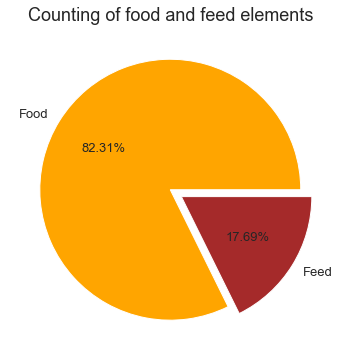

In [28]:
elements = df_prod.Element.value_counts()

sns.set_style('whitegrid')
plt.figure(figsize = (8,6))
plt.title("Counting of food and feed elements", fontsize=18)

labels = elements.index
explode = [0, 0.1] 
colors = ['orange', 'brown']

plt.pie(elements, labels=labels, explode=explode, autopct='%1.2f%%', colors=colors, textprops={'fontsize': 13})

plt.show()

Come prevedibile, gli elementi che riguardano il cibo *sono molto più presenti* nel dataset della produzione. 

Questo significa che nel tempo è stato prodotto molto più cibo che mangime?

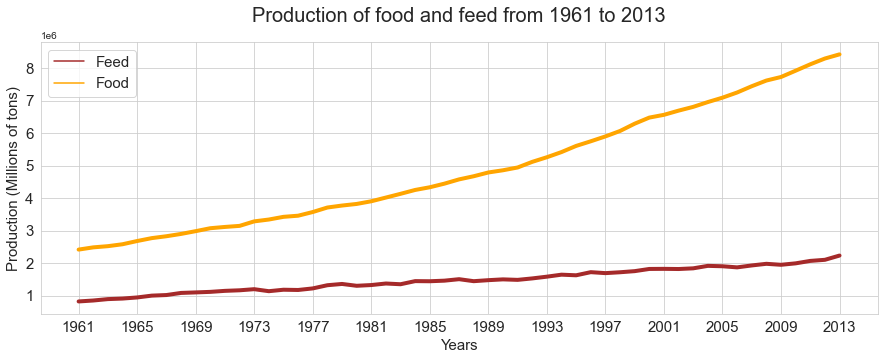

In [29]:
# Raggruppo tutti gli elementi di cibi e mangimi e sommo i valori di produzione di ogni anno
food_feed_prod = df_prod.groupby(['Element', 'Years'])['Production'].sum().reset_index()

sns.set_style('whitegrid')

plt.figure(figsize=(15,5))
plt.title('Production of food and feed from 1961 to 2013', size=20, pad=20)

sns.lineplot(data=food_feed_prod, x='Years', y='Production', hue='Element', linewidth=4, palette=['brown', 'orange'])

plt.ylabel('Production (Millions of tons)', size=15)
plt.yticks(size=15)

plt.xlabel('Years', size=15)
plt.xticks(np.arange(0, 54, 4), size=15)

plt.legend(prop={'size': 15})
plt.show()

Non solo è stato prodotto molto più cibo che mangime dal 1961 al 2013, ma anche il suo incremento di produzione è molto più grande. Infatti, in poco più di 50 anni la produzione di mangime è leggermente raddoppiata, mentre **quella del cibo è più che triplicata!**

Concentriamo l'attenzione sulla **produzione nel 2013**. 

Quali sono stati i **massimi valori di produzione** dei vari alimenti? **Quali paesi** li hanno prodotti?

In [32]:
# Filtro per estrarre solo gli elementi 'Food'
filter_food = df_prod.Element == 'Food'

# Filtro per estrarre solo l'anno 2013
filter_year = df_prod.Years == '2013'

# Creo un subset del dataframe con le condizioni imposte dai filtri e con le colonne che riguardano l'alimento, il paese e il valore di produzione
food_2013 = df_prod.loc[(filter_food) & (filter_year), ['Item','Country_Name', 'Production']]

# Ordino i valori di produzione in maniera decrescente e prendo i primi 20 elementi
food_2013 = food_2013.sort_values(by='Production', ascending=False).reset_index(drop=True).head(20)

# Plot settings
fig = go.Scatter(
    
    y = food_2013.Production,
    x = food_2013.Item,
    text = food_2013.Country_Name,
    name = 'Food',
    mode='markers',

    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = food_2013.Production/4000,
        color = food_2013.Production,
        colorscale=['#03071e','#6A040F', '#D00000', '#F48C06'],
        showscale=True))

# Plot layout
layout= go.Layout(
    autosize= True,
    title= 'Top 20 food products in 2013',
    hovermode= 'closest',

     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False),

    yaxis=dict(
        title= 'Production (1000 tons)',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False)

data = [fig]

fig = go.Figure(data=data, layout=layout)
# fig.show()
py.iplot(fig,filename='scatterplot')

Commenta

In [31]:
# Filtro per estrarre solo gli elementi 'Feed'
filter_feed = df_prod.Element == 'Feed'

# Filtro per estrarre solo l'anno 2013
filter_year = df_prod.Years == '2013'

# Creo un subset del dataframe con le condizioni imposte dai filtri e con le colonne che riguardano l'alimento, il paese e il valore di produzione
feed_2013 = df_prod.loc[(filter_feed) & (filter_year), ['Item','Country_Name', 'Production']]

# Ordino i valori di produzione in maniera decrescente e prendo i primi 20 elementi
feed_2013 = feed_2013.sort_values(by='Production', ascending=False).reset_index(drop=True).head(20)

fig = go.Scatter(
    
    y = feed_2013.Production,
    x = feed_2013.Item,
    text = feed_2013.Country_Name,
    name = 'Feed',
    mode='markers',

    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = feed_2013.Production/2000,
        color = feed_2013.Production,
        colorscale=['#585123','#F2A65A','#F58549','#772F1A'],
        showscale=True))

# Plot layout
layout= go.Layout(
    autosize= True,
    title= 'Top 20 feed products in 2013',
    hovermode= 'closest',

     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False),

    yaxis=dict(
        title= 'Production (1000 tons)',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False)

data = [fig]

fig = go.Figure(data=data, layout=layout)
fig.show()
# py.iplot(fig,filename='scatterplot')

CHE BOMBA! 

In [143]:
country_data = px.data.gapminder()

map_fig = px.scatter_geo(
    country_data,
    locations = 'iso_alpha',
    projection = 'orthographic',
    color = 'continent',
    opacity = .8,
    hover_name = 'country',
    hover_data = ['lifeExp', 'pop', 'year']
    )

map_fig.show()

In [ ]:
# Questo serve per visualizzare in html
# plotly.offline.plot(map_fig, filename= 'map_exp.html', auto_open=True)